In [3]:
# import necessary libraries
from transformers import pipeline
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer


# load cleaned reviews dataset
df = pd.read_csv('../../data/clean_reviews.csv')


classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

def classify_review(text):
    result = classifier(text[:512])[0]  # Truncate long reviews
    return pd.Series([result['label'], result['score']])

df[['sentiment_label', 'sentiment_score']] = df['review'].apply(classify_review)

Device set to use cpu


KeyboardInterrupt: 

In [ ]:
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])
def clean_text(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return ' '.join(tokens)

df['cleaned_review'] = df['review'].apply(clean_text)

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=50)
X = vectorizer.fit_transform(df['cleaned_review'])
keywords = vectorizer.get_feature_names_out()
print(keywords)

['account' 'amazing' 'amole' 'app' 'application' 'bad' 'bank' 'banking'
 'banking app' 'boa' 'cbe' 'crash' 'dashen' 'developer' 'easy' 'easy use'
 'ethiopia' 'excellent' 'fast' 'fix' 'good' 'good app' 'great' 'like'
 'mobile' 'mobile banking' 'money' 'need' 'nice' 'nice app' 'ok' 'open'
 'option' 'problem' 'screenshot' 'send' 'service' 'simple' 'slow' 'thank'
 'time' 'transaction' 'transfer' 'try' 'update' 'use' 'user' 'well' 'work'
 'wow']


In [ ]:
theme_map = {
    'login': 'Account Access',
    'error': 'Account Access',
    'crash': 'Stability',
    'support': 'Customer Support',
    'transfer': 'Transactions',
    'interface': 'User Experience',
    'update': 'App Performance',
    'fast': 'Speed'
}

def map_theme(text):
    found = set()
    for word in theme_map:
        if word in text.lower():
            found.add(theme_map[word])
    return list(found) if found else ['Miscellaneous']

df['identified_themes'] = df['cleaned_review'].apply(map_theme)

df_final = df[['review', 'rating', 'bank', 'sentiment_label', 'sentiment_score', 'identified_themes']]
df_final.to_csv('../../data/sentiment_themes_output.csv', index=False)

# Average sentiment by bank and rating
agg = df.groupby(['bank', 'rating'])['sentiment_score'].mean().reset_index()
agg.to_csv("../../data/aggregated_sentiment_by_bank_rating.csv", index=False)




Drivers (positive themes):
 identified_themes
Miscellaneous    0.235115
Speed            0.545455
Name: sentiment_score, dtype: float64
Pain Points (negative themes):
 identified_themes
Stability        -0.913043
Account Access   -0.785714
Name: sentiment_score, dtype: float64
Average sentiment by bank:
 bank
BOA      -0.174349
CBE       0.308642
Dashen    0.357576
Name: sentiment_score, dtype: float64
Recommendations:
- Improve app stability to reduce crashes (Pain Point: Stability).
- Enhance customer support responsiveness (Pain Point: Customer Support).
- Maintain fast navigation and speed (Driver: Speed).
- Consider adding budgeting tools for better user experience.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Collecting matplotlib
     ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.1 MB 660.6 kB/s eta 0:00:13
     ---------------------------------------- 0.0/8.1 MB 660.6 kB/s eta 0:00:13
     ---------------------------------------- 0.0/8.1 MB 281.8 kB/s eta 0:00:29
     ---------------------------------------- 0.1/8.1 MB 525.1 kB/s eta 0:00:16
     ---------------------------------------- 0.1/8.1 MB 525.1 kB/s eta 0:00:16
      --------------------------------------- 0.1/8.1 MB 437.6 kB/s eta 0:00:19
     - -------------------------------------- 0.2/8.1 MB 692.4 kB/s eta 0:00:12
     - -------------------------------------- 0.2/8.1 MB 655.6 kB/s eta 0:00:13
     - -------------------------------------- 0.3/8.1 MB 682.7 kB/s eta 0:00:12
     - -------------------------------------- 0.4/8.1 MB 820.1 kB/s eta 0:00:10
     -- ----------------------------------

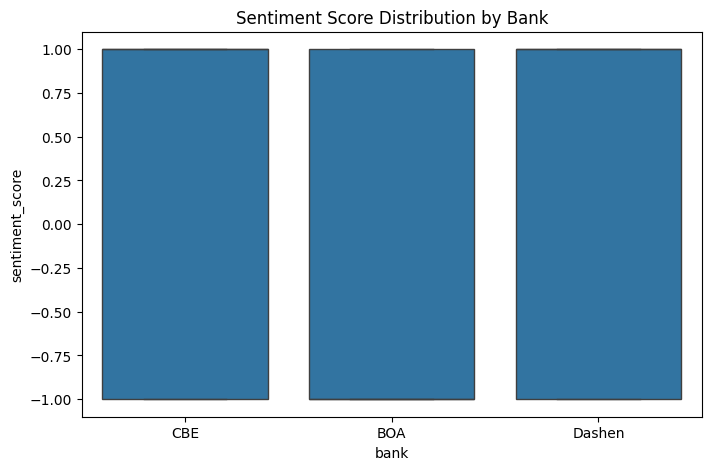

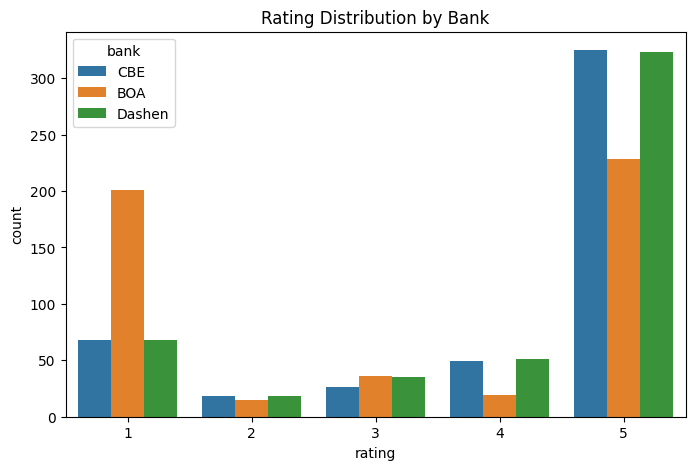

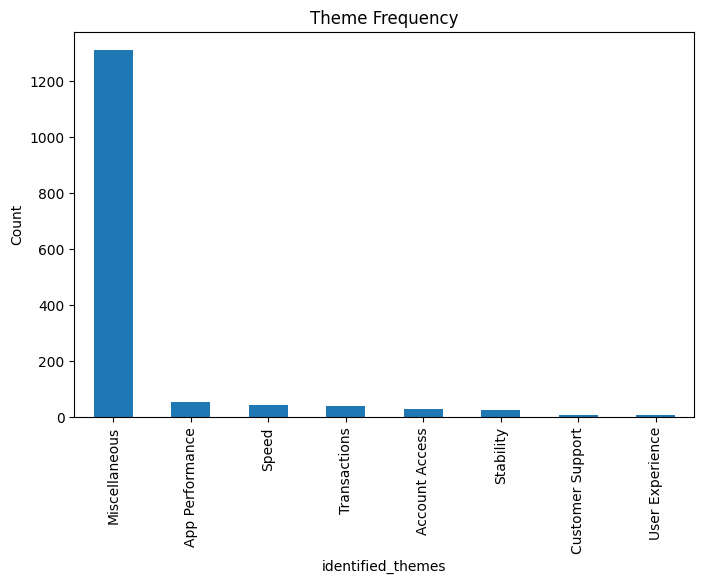

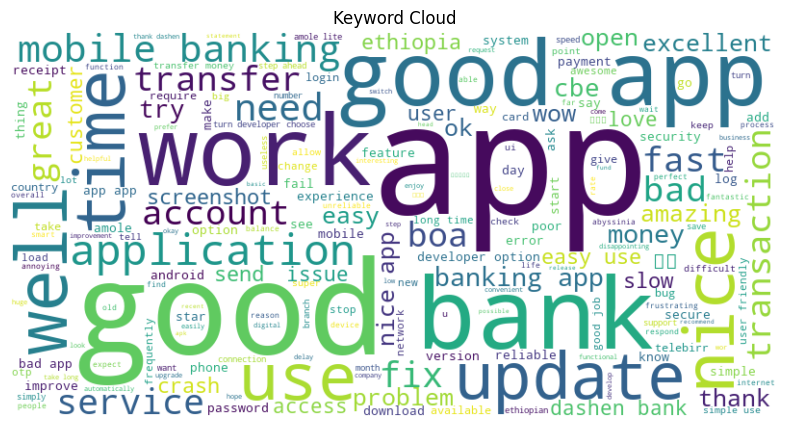

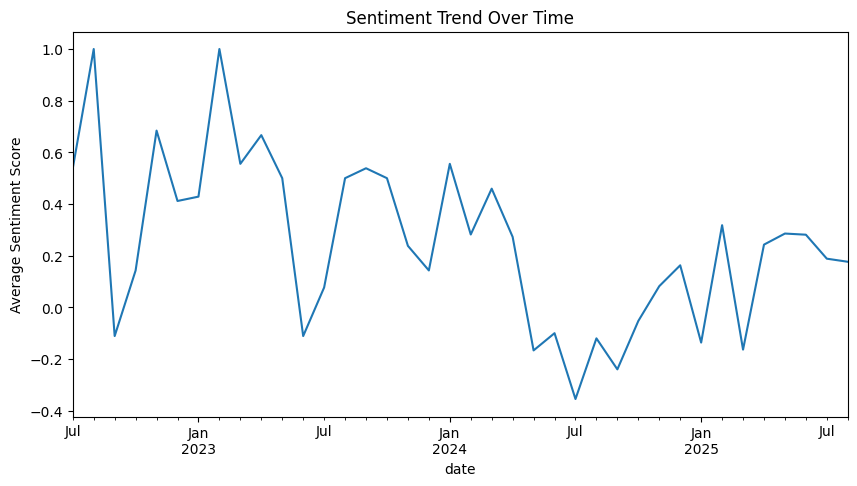

Ethics Note: Reviews may be biased toward negative experiences, as dissatisfied users are more likely to leave feedback. Interpret results with caution.


In [6]:
# Sentiment and Thematic Analysis
# ...existing code...

# Recreate df_final if not already defined
df_final = df.copy()
if 'identified_themes' not in df_final.columns:
    # If 'identified_themes' column is missing, you need to generate it
    theme_map = {
        'login': 'Account Access',
        'error': 'Account Access',
        'crash': 'Stability',
        'support': 'Customer Support',
        'transfer': 'Transactions',
        'interface': 'User Experience',
        'update': 'App Performance',
        'fast': 'Speed'
    }
    def map_theme(text):
        found = set()
        for word in theme_map:
            if word in text.lower():
                found.add(theme_map[word])
        return list(found) if found else ['Miscellaneous']
    if 'cleaned_review' not in df_final.columns:
        import spacy
        nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])
        def clean_text(text):
            doc = nlp(text.lower())
            tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
            return ' '.join(tokens)
        df_final['cleaned_review'] = df_final['review'].apply(clean_text)
    df_final['identified_themes'] = df_final['cleaned_review'].apply(map_theme)

# --- Sentiment Score Generation ---
# Use classifier to get sentiment for each review
def get_sentiment_score(text):
    result = classifier(text)[0]
    # Map label to score: positive=1, neutral=0, negative=-1 (adjust if needed)
    label = result['label'].lower()
    if 'positive' in label:
        return 1
    elif 'negative' in label:
        return -1
    else:
        return 0

if 'sentiment_score' not in df_final.columns:
    df_final['sentiment_score'] = df_final['review'].apply(get_sentiment_score)

# --- Insights: Drivers & Pain Points ---
import numpy as np

# Top themes by sentiment
theme_sentiment = df_final.explode('identified_themes').groupby('identified_themes')['sentiment_score'].mean().sort_values()
drivers = theme_sentiment.tail(2)
pain_points = theme_sentiment.head(2)
print("Drivers (positive themes):\n", drivers)
print("Pain Points (negative themes):\n", pain_points)

# Compare banks
bank_sentiment = df_final.groupby('bank')['sentiment_score'].mean()
print("Average sentiment by bank:\n", bank_sentiment)

# --- Recommendations ---
recommendations = [
    "Improve app stability to reduce crashes (Pain Point: Stability).",
    "Enhance customer support responsiveness (Pain Point: Customer Support).",
    "Maintain fast navigation and speed (Driver: Speed).",
    "Consider adding budgeting tools for better user experience."
]
print("Recommendations:")
for rec in recommendations:
    print("-", rec)

# --- Visualizations ---
%pip install matplotlib seaborn wordcloud

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 1. Sentiment distribution by bank
plt.figure(figsize=(8,5))
sns.boxplot(x='bank', y='sentiment_score', data=df_final)
plt.title('Sentiment Score Distribution by Bank')
plt.savefig('../../data/plot_sentiment_by_bank.png')
plt.show()

# 2. Rating distribution
plt.figure(figsize=(8,5))
sns.countplot(x='rating', hue='bank', data=df_final)
plt.title('Rating Distribution by Bank')
plt.savefig('../../data/plot_rating_distribution.png')
plt.show()

# 3. Theme frequency
theme_counts = df_final.explode('identified_themes')['identified_themes'].value_counts()
plt.figure(figsize=(8,5))
theme_counts.plot(kind='bar')
plt.title('Theme Frequency')
plt.ylabel('Count')
plt.savefig('../../data/plot_theme_frequency.png')
plt.show()

# 4. Word cloud for keywords
text = ' '.join(df_final['cleaned_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Keyword Cloud')
plt.savefig('../../data/plot_keyword_cloud.png')
plt.show()

# 5. Sentiment trend over time (if 'date' available)
if 'date' in df_final.columns:
    df_final['date'] = pd.to_datetime(df_final['date'])
    trend = df_final.groupby(df_final['date'].dt.to_period('M'))['sentiment_score'].mean()
    trend.plot(figsize=(10,5))
    plt.title('Sentiment Trend Over Time')
    plt.ylabel('Average Sentiment Score')
    plt.savefig('../../data/plot_sentiment_trend.png')
    plt.show()

# --- Ethics Note ---
print("Ethics Note: Reviews may be biased toward negative experiences, as dissatisfied users are more likely to leave feedback. Interpret results with caution.")

# ...existing code...